In [20]:
import pandas as pd
import xgboost as xgb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
data_22 = pd.read_csv('data/laliga21-22.csv')
data_23 = pd.read_csv('data/laliga22-23.csv')
data_24 = pd.read_csv('data/laliga23-24.csv')
data_25 = pd.read_csv('data/laliga24-25.csv')

In [22]:
#possible_winners = ['Real Madrid', 'Barcelona', 'Ath Madrid', 'Ath Bilbao', 'Betis', 'Villarreal']

In [23]:
data_22["GapToLeader"] = data_22["Pts"] - data_22["Pts"].max()
data_23["GapToLeader"] = data_23["Pts"] - data_23["Pts"].max()
data_24["GapToLeader"] = data_24["Pts"] - data_24["Pts"].max()
data_25["GapToLeader"] = data_25["Pts"] - data_25["Pts"].max()

In [24]:
full_data = pd.concat([data_22,data_23,data_24,data_25], ignore_index=True)
full_data = full_data.drop(columns=['TeamID','last_5_winners'])
full_data.describe()

,GoalsForHome,GoalsAgainstHome,GoalsForAway,GoalsAgainstAway,WinsHome,DrawsHome,LossesHome,WinsAway,DrawsAway,LossesAway,...,Losses,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Rank,Rating,GapToLeader
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,...,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,27.612500,21.212500,21.212500,27.612500,8.537500,5.050000,5.412500,5.412500,5.050000,8.537500,...,13.950000,51.950000,1.367500,48.495000,48.492500,-0.001250,-0.000250,10.500000,6.848875,-37.300000
std,9.495494,5.797629,7.464165,8.168314,3.390022,1.915295,2.504142,3.263507,2.018271,3.360017,...,5.364912,17.133061,0.450762,12.417667,8.764222,18.243483,0.480266,5.802662,0.111832,17.490974
min,11.000000,4.000000,10.000000,13.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,16.000000,0.420000,29.300000,33.000000,-33.000000,-0.870000,1.000000,6.690000,-74.000000
25%,20.750000,18.000000,15.000000,20.750000,6.000000,4.000000,3.750000,3.000000,4.000000,6.750000,...,10.000000,41.000000,1.080000,39.375000,42.875000,-9.900000,-0.257500,5.750000,6.780000,-47.250000
50%,26.000000,21.000000,20.000000,27.500000,8.000000,5.000000,6.000000,4.500000,5.000000,9.000000,...,15.000000,47.500000,1.250000,44.450000,47.500000,-4.250000,-0.110000,10.500000,6.820000,-41.000000
75%,33.250000,25.000000,25.000000,32.000000,10.250000,6.000000,7.000000,7.000000,6.000000,10.000000,...,17.000000,62.500000,1.642500,54.200000,54.225000,11.500000,0.302500,15.250000,6.900000,-26.250000
max,53.000000,36.000000,50.000000,58.000000,16.000000,9.000000,12.000000,14.000000,10.000000,18.000000,...,30.000000,95.000000,2.500000,91.500000,70.000000,49.500000,1.300000,20.000000,7.200000,0.000000


In [25]:
teams = full_data['Team'].unique()
teams_dict = {team: i+1 for i, team in enumerate(teams)}
full_data["Team"] = full_data["Team"].map(teams_dict)
teams_dict

{'Valencia': 1,
 'Cadiz': 2,
 'Mallorca': 3,
 'Alaves': 4,
 'Osasuna': 5,
 'Celta': 6,
 'Barcelona': 7,
 'Sevilla': 8,
 'Villarreal': 9,
 'Elche': 10,
 'Betis': 11,
 'Espanol': 12,
 'Granada': 13,
 'Ath Bilbao': 14,
 'Sociedad': 15,
 'Ath Madrid': 16,
 'Levante': 17,
 'Getafe': 18,
 'Vallecano': 19,
 'Real Madrid': 20,
 'Valladolid': 21,
 'Almeria': 22,
 'Girona': 23,
 'Las Palmas': 24,
 'Leganes': 25}

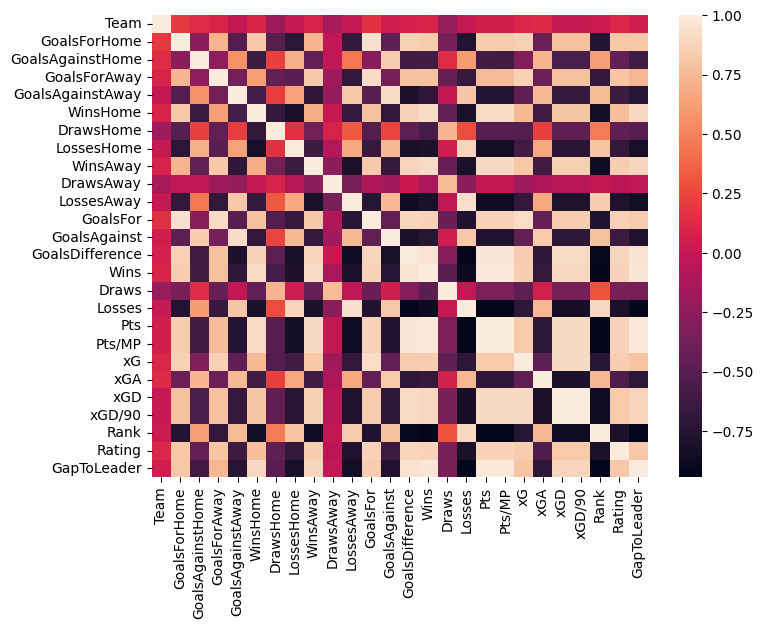

In [26]:
# Assuming 'df' is your DataFrame
corr_df = full_data.corr(method="pearson")
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df)
plt.show()

In [27]:
full_data.describe()

,Team,GoalsForHome,GoalsAgainstHome,GoalsForAway,GoalsAgainstAway,WinsHome,DrawsHome,LossesHome,WinsAway,DrawsAway,...,Losses,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Rank,Rating,GapToLeader
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,...,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,11.912500,27.612500,21.212500,21.212500,27.612500,8.537500,5.050000,5.412500,5.412500,5.050000,...,13.950000,51.950000,1.367500,48.495000,48.492500,-0.001250,-0.000250,10.500000,6.848875,-37.300000
std,6.910263,9.495494,5.797629,7.464165,8.168314,3.390022,1.915295,2.504142,3.263507,2.018271,...,5.364912,17.133061,0.450762,12.417667,8.764222,18.243483,0.480266,5.802662,0.111832,17.490974
min,1.000000,11.000000,4.000000,10.000000,13.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,16.000000,0.420000,29.300000,33.000000,-33.000000,-0.870000,1.000000,6.690000,-74.000000
25%,6.000000,20.750000,18.000000,15.000000,20.750000,6.000000,4.000000,3.750000,3.000000,4.000000,...,10.000000,41.000000,1.080000,39.375000,42.875000,-9.900000,-0.257500,5.750000,6.780000,-47.250000
50%,11.500000,26.000000,21.000000,20.000000,27.500000,8.000000,5.000000,6.000000,4.500000,5.000000,...,15.000000,47.500000,1.250000,44.450000,47.500000,-4.250000,-0.110000,10.500000,6.820000,-41.000000
75%,18.000000,33.250000,25.000000,25.000000,32.000000,10.250000,6.000000,7.000000,7.000000,6.000000,...,17.000000,62.500000,1.642500,54.200000,54.225000,11.500000,0.302500,15.250000,6.900000,-26.250000
max,25.000000,53.000000,36.000000,50.000000,58.000000,16.000000,9.000000,12.000000,14.000000,10.000000,...,30.000000,95.000000,2.500000,91.500000,70.000000,49.500000,1.300000,20.000000,7.200000,0.000000


In [28]:
'''data_22 = data_22[data_22['Team'].isin(possible_winners)]
data_23 = data_23[data_23['Team'].isin(possible_winners)]
data_24 = data_24[data_24['Team'].isin(possible_winners)]
data_25 = data_25[data_25['Team'].isin(possible_winners)]'''

"data_22 = data_22[data_22['Team'].isin(possible_winners)]\ndata_23 = data_23[data_23['Team'].isin(possible_winners)]\ndata_24 = data_24[data_24['Team'].isin(possible_winners)]\ndata_25 = data_25[data_25['Team'].isin(possible_winners)]"

In [29]:
data_22_corr = data_22.drop(columns=['TeamID', 'Team', 'xGA', 'xGD', 'xGD/90','GoalsForHome', 'GoalsAgainstHome', 'GoalsForAway', 'GoalsAgainstAway', 'WinsHome', 'WinsAway', 'LossesHome', 'LossesAway', 'DrawsHome', 'DrawsAway', 'Pts/MP'])

data_23_corr = data_23.drop(columns=['TeamID', 'Team','last_5_winners', 'xGA', 'xGD', 'xGD/90','GoalsForHome', 'GoalsAgainstHome', 'GoalsForAway', 'GoalsAgainstAway', 'WinsHome', 'WinsAway', 'LossesHome', 'LossesAway', 'DrawsHome', 'DrawsAway', 'Pts/MP'])

data_24_corr = data_24.drop(columns=['TeamID', 'Team','last_5_winners', 'xGA', 'xGD', 'xGD/90','GoalsForHome', 'GoalsAgainstHome', 'GoalsForAway', 'GoalsAgainstAway', 'WinsHome', 'WinsAway', 'LossesHome', 'LossesAway', 'DrawsHome', 'DrawsAway', 'Pts/MP'])

data_25_corr = data_25.drop(columns=['TeamID', 'Team','last_5_winners', 'xGA', 'xGD', 'xGD/90','GoalsForHome', 'GoalsAgainstHome', 'GoalsForAway', 'GoalsAgainstAway', 'WinsHome', 'WinsAway', 'LossesHome', 'LossesAway', 'DrawsHome', 'DrawsAway', 'Pts/MP'])

In [30]:
data_22_corr.columns

Index(['GoalsFor', 'GoalsAgainst', 'GoalsDifference', 'Wins', 'Draws',
       'Losses', 'Pts', 'xG', 'Rank', 'Rating', 'GapToLeader'],
      dtype='object')

In [31]:
# Concatenate training data from 23 and 24 seasons
X_train = pd.concat([data_22_corr, data_23_corr, data_24_corr], ignore_index=True)
X_train = X_train.drop(columns=['Rank'])

# Prepare test data from 25 season (drop target column)
X_test = data_25_corr.drop(columns=['Rank'])

# Concatenate training labels from 23 and 24 seasons
y_train = pd.concat([data_22_corr["Rank"], data_23_corr["Rank"], data_24_corr["Rank"]], ignore_index=True)

# Test labels from 25 season
y_test = data_25_corr["Rank"]


In [32]:
pos = sum(y_train == 1)
neg = sum(y_train == 0)
scale_pos_weight = neg / pos

model = xgb.XGBRegressor(
    max_depth=4,
    n_estimators=200,
    random_state=42
)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [33]:
predicted_ranks = model.predict(X_test)

In [34]:
# Invert ranks to "scores" (higher score = better chance)
inv_ranks = 1 / predicted_ranks

# Normalize to get probabilities summing to 1
win_probs = inv_ranks / np.sum(inv_ranks)

# Add to test dataframe for review
result = data_25.copy()
result['LaLiga_Champions'] = win_probs *100
ranks = np.arange(1,len(y_test)+1)
result = result.sort_values(by='LaLiga_Champions', ascending=False)
result['LaLiga_Champions'] = result['LaLiga_Champions'].round(2).astype(str) + '%'
result['Predicted_Rank'] = ranks

print(result[['Team','LaLiga_Champions', 'Predicted_Rank']])

           Team LaLiga_Champions  Predicted_Rank
11    Barcelona           19.89%               1
14  Real Madrid           16.84%               2
17   Ath Madrid            9.85%               3
0    Ath Bilbao             7.3%               4
9    Villarreal            6.94%               5
1         Betis            4.92%               6
2         Celta            4.09%               7
4       Osasuna             3.5%               8
18    Vallecano             3.4%               9
6      Sociedad            3.05%              10
7      Mallorca             2.9%              11
5      Valencia            2.65%              12
12      Espanol            2.11%              13
16       Alaves            2.09%              14
10      Sevilla            2.06%              15
13       Getafe            1.94%              16
19       Girona            1.77%              17
15      Leganes            1.71%              18
3    Las Palmas            1.55%              19
8    Valladolid     

In [35]:
for col in X_train.columns:
    print(f"{col}: {model.feature_importances_[X_train.columns.get_loc(col)]}")

GoalsFor: 0.0009425570606254041
GoalsAgainst: 0.0031393903773278
GoalsDifference: 0.017231671139597893
Wins: 0.023597532883286476
Draws: 0.0003178031765855849
Losses: 0.002951008267700672
Pts: 0.864467442035675
xG: 0.00043352649663574994
Rating: 0.002662527607753873
GapToLeader: 0.08425657451152802


In [36]:
probs = result[['Team', 'LaLiga_Champions', 'Predicted_Rank']]
probs

,Team,LaLiga_Champions,Predicted_Rank
11,Barcelona,19.89%,1
14,Real Madrid,16.84%,2
17,Ath Madrid,9.85%,3
0,Ath Bilbao,7.3%,4
9,Villarreal,6.94%,5
1,Betis,4.92%,6
2,Celta,4.09%,7
4,Osasuna,3.5%,8
18,Vallecano,3.4%,9
6,Sociedad,3.05%,10


In [37]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted_ranks.round())
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.60
